In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab
import csv
import re
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords as sw
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix

In [2]:
development = pd.read_csv ("development.csv")
evaluation = pd.read_csv ("evaluation.csv")
X = development["text"]
y = development["class"]

In [3]:
#DATA EXPLORATION

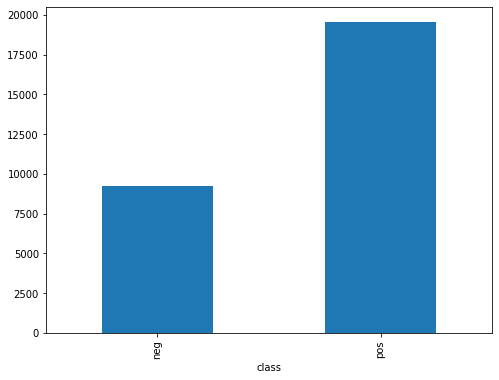

class
neg     9222
pos    19532
Name: text, dtype: int64


In [4]:
fig = plt.figure(figsize=(8,6))
development.groupby('class').text.count().plot.bar(ylim=0)
plt.show()
print(development.groupby('class').text.count())
dev_pos = development[development['class'] == 'pos']
dev_neg = development[development['class'] == 'neg']
X_pos = dev_pos["text"]
X_neg = dev_neg["text"]
y_pos = dev_pos["class"]
y_neg = dev_neg["class"]

In [5]:
stopwords = sw.words('italian')
stopwords.remove('non')
stopwords.remove('ma')

In [6]:
count = CountVectorizer(stop_words = stopwords)

In [7]:
X_pos_count = count.fit_transform(X_pos).astype("float32")
total_words_pos = X_pos_count.sum(axis = 0)

In [8]:
indices = np.argsort(total_words_pos)
feature_names = np.array(count.get_feature_names())[indices]
common_pos_words = []

N = -1
print("  . Most common words with positive evaluations:\n")
while(N > -11):
    common_pos_words.append((feature_names[0][N]))
    N = N - 1
print(*common_pos_words, sep = "\n") 

  . Most common words with positive evaluations:

hotel
molto
non
personale
ma
colazione
camera
camere
posizione
disponibile


In [9]:
X_neg_count = count.fit_transform(X_neg).astype("float32")
total_words_neg = X_neg_count.sum(axis = 0)

In [10]:
indices = np.argsort(total_words_neg)
feature_names = np.array(count.get_feature_names())[indices]
common_neg_words = []

N = -1
print("  . Most common words with negative evaluations:\n")
while(N > -11):
    common_neg_words.append((feature_names[0][N]))
    N = N - 1
print(*common_neg_words, sep = "\n") 

  . Most common words with negative evaluations:

non
hotel
ma
camera
molto
colazione
personale
stato
solo
bagno


In [11]:
common_words_both = []
for word_pos in common_pos_words:
    if word_pos in common_neg_words:
        common_words_both.append(word_pos)
print(common_words_both)

['hotel', 'molto', 'non', 'personale', 'ma', 'colazione', 'camera']


In [12]:
s1 = pd.Series(common_pos_words)
s2 = pd.Series(common_neg_words)
df = pd.DataFrame({'Pos':s1, 'Neg':s2})
df

,Pos,Neg
0,hotel,non
1,molto,hotel
2,non,ma
3,personale,camera
4,ma,molto
5,colazione,colazione
6,camera,personale
7,camere,stato
8,posizione,solo
9,disponibile,bagno


In [13]:
X_count = count.fit_transform(X).astype("float32")
for word, index in count.vocabulary_.items():
    if not word.isalnum() :
        print(word)

__lw_engspa_dt_inn__
buon_nms
yr_nms
loggia_nms
glum_nup
cuteness_nus
indulgent_nfs
me_ct
striped_nfs
_naples
splurge_nus
_prima
dolente_
_un
ceramica_
breafast_nus
_certamente_
_personale
modesta_
_da_
burned_nfs
andrea_m92
vaporetto_nup
grungy_nmp
wi_fi
_27
wouldnt_nus
o_o
questo_lento
doesnt_nus
si_aprivano
prosecco_nmp
cinnamon_nms
smug_nus
_molta_
_parcheggio
_colanzione
avrà_bisogno
thw_nus
prenotare_un_hotel_con_clever_hotels
general_discussion
hotel_napolit_amo_212443
my_nms
informing_nup
turvy_nus
topsy_nus
spectular_nup
anchient_nus
4_5
bended_nus


In [14]:
del(dev_pos)
del(dev_neg)
del(X_pos)
del(X_neg)
del(y_pos)
del(y_neg)
del(X_pos_count)
del(total_words_pos)
del(feature_names)
del(X_neg_count)
del(total_words_neg)
del(s1)
del(s2)
del(df)
del(X_count)

In [15]:
#PREPROCESSING

In [16]:
class StemmeTokenizer(object):
    def __init__(self):
        self.stemmer = SnowballStemmer('italian', ignore_stopwords=True)
    def __call__(self, document):
        lemmas = []
        re_digit = re.compile("[0-9]")
        document = document.replace("_", " ")
        document = document.replace("'", " ")

        for t in word_tokenize(document):
            t = t.strip()
            lemma = self.stemmer.stem(t)
            if lemma not in string.punctuation and (re_digit.match(lemma) or len(lemma) > 1):
                lemmas.append(lemma)
        return lemmas

In [17]:
tokenizer = StemmeTokenizer()
#vect = TfidfVectorizer(ngram_range = (1,2), stop_words = stopwords + ['aver', 'far', 'esser', 'star'] + ['hotel', 'molt', 'personal', 'colazion', 'camer'], min_df = 4, tokenizer = tokenizer)

In [18]:
#ALGORITHM CHOICE

In [19]:
#models = [RandomForestClassifier(), LinearSVC(), MLPClassifier(tol = 0.01)]

In [20]:
#kfold = KFold(n_splits=5, shuffle=True)

In [21]:
#i = 0
#j = 0
#f1 = []
#score = []
#for model in models:
 #   for train_indices, test_indices in kfold.split(X, y):
  #      X_train = X[train_indices]
   #     X_test = X[test_indices]
    #    y_train = y[train_indices]
     #   y_test = y[test_indices]
      #  X_train_tokenized = vect.fit_transform(X_train)
       # X_test_tokenized = vect.transform(X_test)
        #model.fit(X_train_tokenized, y_train)
        #y_pred = model.predict(X_test_tokenized)
        #f1.append(f1_score(y_test, y_pred, average='weighted'))
    #score.append(sum(f1)/len(f1))

In [22]:
#print(score)

In [23]:
#TUNING AND VALIDATION

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train_tokenized = vect.fit_transform(X_train).astype("float32")
#X_test_tokenized = vect.transform(X_test).astype("float32")

In [25]:
#grid = ParameterGrid({"verbose": [False], "alpha": [1e-3, 1e-4, 1e-5], "tol": [1e-2], "batch_size": [100, 200, 300], "n_iter_no_change": [1]})

#for params in grid:
 #   model = MLPClassifier(**params)
  #  model.fit(X_train_tokenized, y_train)
   # y_pred = model.predict(X_test_tokenized)
    #print(params)
    #print(f1_score(y_test, y_pred, average='weighted'))

In [26]:
#model = MLPClassifier(tol = 0.01, verbose = True, n_iter_no_change = 2)
#model.fit(X_train_tokenized, y_train)
#y_pred = model.predict(X_test_tokenized)
#print(f1_score(y_test, y_pred, average='weighted'))
#conf_mat = confusion_matrix(y_test, y_pred)

In [27]:
#conf_mat_df = pd.DataFrame(conf_mat, columns=['Neg', 'Pos'], index=['Neg', 'Pos'])
#conf_mat_df

In [28]:
#del(vect)
#del(model)

In [29]:
vect = TfidfVectorizer(ngram_range = (1,2), stop_words = stopwords + ['aver', 'far', 'esser', 'star'] + ['hotel', 'molt', 'personal', 'colazion', 'camer'], min_df = 4, tokenizer = tokenizer)

In [30]:
X_tokenized = vect.fit_transform(X).astype("float32")

In [31]:
model = MLPClassifier(tol = 0.01, verbose = True, n_iter_no_change = 2)
model.fit(X_tokenized, y)

Iteration 1, loss = 0.32451349
Iteration 2, loss = 0.07289464
Iteration 3, loss = 0.02829085
Iteration 4, loss = 0.01352064
Iteration 5, loss = 0.00837581
Iteration 6, loss = 0.00621512
Iteration 7, loss = 0.00509271
Training loss did not improve more than tol=0.010000 for 2 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=2, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.01,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [32]:
X_eval = evaluation["text"]
X_eval_tokenized = vect.transform(X_eval).astype("float32")
y_eval = model.predict(X_eval_tokenized)

In [33]:
def writeOutput(y_eval):
    output = {}
    name = []
    i = 0
    
    for y in y_eval:
        output[i] = y
        i = i + 1

    import csv
    with open('test.csv', 'w') as f:
        f.write("Id,Predicted\n")
        for key in output.keys():
            f.write("%s,%s\n"%(key,output[key]))

In [34]:
writeOutput(y_eval)